# Solution Development 
1. Importing Visualization Libraries and data pre-processing 

2. Providing a general analysis of your dataset (descriptive statistics) and;
   - answer the research questions. 
   - Include graphs and other types of visual representation that give essential information about the data components such as
     + Scatterplots
     + Pair Plots
     + Categorical Plots

### Importing Visualization Libraries and data pre-processing

In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime as date
from datetime import timedelta

In [419]:
# To ensures charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [420]:
#import data pre-processing which is 'airline_clean_data.csv'
airline_clean = pd.read_csv('airline_clean_data.csv')

In [421]:
# Check data
airline_clean.head()

,Unnamed: 0,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,0,Arthur Savage,Jan-23,LHR to JNB,3,Unknown,complain about the way we were treated,My wife and I who are 76 and 77 respectively a...,Couple Leisure,Economy Class
1,1,A Oldham,Jan-23,LHR to IST,1,Unknown,absolute disgrace,Verified Review Absolute disgrace. They canc...,Solo Leisure,Economy Class
2,2,D Rigby,Jan-23,GIB to LHR,2,Unknown,worse than Ryanair or EasyJet,Verified Review Cancelled a British Airways ...,Couple Leisure,Economy Class
3,3,F George,Jan-23,EDI to LGW,3,Unknown,extremely moody check in,Have been impressed with British Airways in th...,Couple Leisure,Economy Class
4,4,Julie Johnston,Jan-23,GLA to CDG via LHR,7,Unknown,great at helping us,My son and I flew British Airways from Glasgow...,Family Leisure,Economy Class


In [422]:
airline_clean.dtypes

Unnamed: 0         int64
Passanger_Name    object
Flying_month      object
Route             object
Rating             int64
Verified          object
Review_title      object
Review_content    object
Traveller_type    object
Class             object
dtype: object

In [423]:
#drop column 'unnamed:0'. This is not needed for analysis.
airline_clean = airline_clean.drop(columns = ['Unnamed: 0'])

In [424]:
airline_clean

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Arthur Savage,Jan-23,LHR to JNB,3,Unknown,complain about the way we were treated,My wife and I who are 76 and 77 respectively a...,Couple Leisure,Economy Class
1,A Oldham,Jan-23,LHR to IST,1,Unknown,absolute disgrace,Verified Review Absolute disgrace. They canc...,Solo Leisure,Economy Class
2,D Rigby,Jan-23,GIB to LHR,2,Unknown,worse than Ryanair or EasyJet,Verified Review Cancelled a British Airways ...,Couple Leisure,Economy Class
3,F George,Jan-23,EDI to LGW,3,Unknown,extremely moody check in,Have been impressed with British Airways in th...,Couple Leisure,Economy Class
4,Julie Johnston,Jan-23,GLA to CDG via LHR,7,Unknown,great at helping us,My son and I flew British Airways from Glasgow...,Family Leisure,Economy Class
...,...,...,...,...,...,...,...,...,...
942,D Bartul,Dec-23,Vancouver to Delhi via London,1,Trip Verified,felt misguided and misinformed,Vancouver to Delhi via London. We were booked ...,Family Leisure,Economy Class
943,E King,Dec-23,London Heathrow to Bangkok via Doha,2,Trip Verified,my suitcase didnâ€™t arrive with me,"Turned up 3.5 hours in advance, Terminal 5 at ...",Solo Leisure,Economy Class
944,R Marton,Dec-23,London to Phoenix,5,Trip Verified,luggage was finally delivered on Thursday,Missing baggage customer service was the worst...,Solo Leisure,Premium Economy
945,A Gateolis,Dec-23,London to Larnaca,4,Trip Verified,electronics are very poor,Disappointing again especially on business. Th...,Business,Business Class


In [425]:
airline_clean.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'Class'],
      dtype='object')

In [426]:
#Data Manipulation
#Grouping the passengers name at achieve the passenger number is another column
x = airline_clean.groupby(['Passanger_Name'])['Passanger_Name'].count()

In [427]:
#Input X variable into a Dataframe and rename the count column
df = pd.DataFrame(x)
df.rename(columns = {'Passanger_Name' : 'Passanger_Num'}, inplace = True)
df

,Passanger_Num
Passanger_Name,
A Allam,1
A Almasha,1
A Bhatia,1
A Boyd,1
A Breceita,1
...,...
Y Li,1
Yang Zhou,1
Yuriy Karpov,1


In [428]:
#Join df to airline_clean to make another airline_clean in order to achieve the count of passengers
airline_clean = pd.merge(airline_clean,df, how='left', on='Passanger_Name')

In [429]:
airline_clean

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Passanger_Num
0,Arthur Savage,Jan-23,LHR to JNB,3,Unknown,complain about the way we were treated,My wife and I who are 76 and 77 respectively a...,Couple Leisure,Economy Class,1
1,A Oldham,Jan-23,LHR to IST,1,Unknown,absolute disgrace,Verified Review Absolute disgrace. They canc...,Solo Leisure,Economy Class,1
2,D Rigby,Jan-23,GIB to LHR,2,Unknown,worse than Ryanair or EasyJet,Verified Review Cancelled a British Airways ...,Couple Leisure,Economy Class,1
3,F George,Jan-23,EDI to LGW,3,Unknown,extremely moody check in,Have been impressed with British Airways in th...,Couple Leisure,Economy Class,1
4,Julie Johnston,Jan-23,GLA to CDG via LHR,7,Unknown,great at helping us,My son and I flew British Airways from Glasgow...,Family Leisure,Economy Class,1
...,...,...,...,...,...,...,...,...,...,...
942,D Bartul,Dec-23,Vancouver to Delhi via London,1,Trip Verified,felt misguided and misinformed,Vancouver to Delhi via London. We were booked ...,Family Leisure,Economy Class,1
943,E King,Dec-23,London Heathrow to Bangkok via Doha,2,Trip Verified,my suitcase didnâ€™t arrive with me,"Turned up 3.5 hours in advance, Terminal 5 at ...",Solo Leisure,Economy Class,1
944,R Marton,Dec-23,London to Phoenix,5,Trip Verified,luggage was finally delivered on Thursday,Missing baggage customer service was the worst...,Solo Leisure,Premium Economy,2
945,A Gateolis,Dec-23,London to Larnaca,4,Trip Verified,electronics are very poor,Disappointing again especially on business. Th...,Business,Business Class,1


#### General analysis of the dataset (descriptive statistics) and answer the research questions

<AxesSubplot:xlabel='Flying_month'>

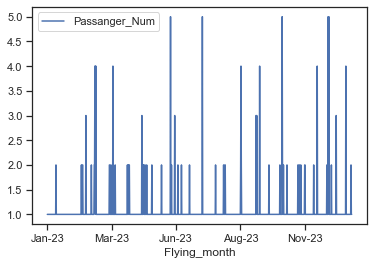

In [430]:
# Create a scatterplot for the "passengers_num" and "Flying_month" columns in seaborn

airline_clean.plot(x='Flying_month', y='Passanger_Num')



###### 
This show reaction on holiday booking period i.e most of the passengers obtained airline holiday booking system in Jun-23, Jul-23,Oct-23 and early Dec-23 while the lowest booking reflected on Jan-23 and late Dec-23. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

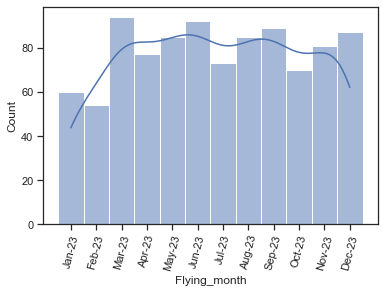

In [431]:
#create an histogram chart to achieve most holiday booking system occurrence period.
hist_1 = sns.histplot(airline_clean['Flying_month'],bins = 30, kde = True)
plt.xticks(rotation = 75)

###### 
The histr Chart show that most of the booking happen in the month of Mar-23

Text(0.5, 1.0, 'Frequency Holiday Booking Traveling Type')

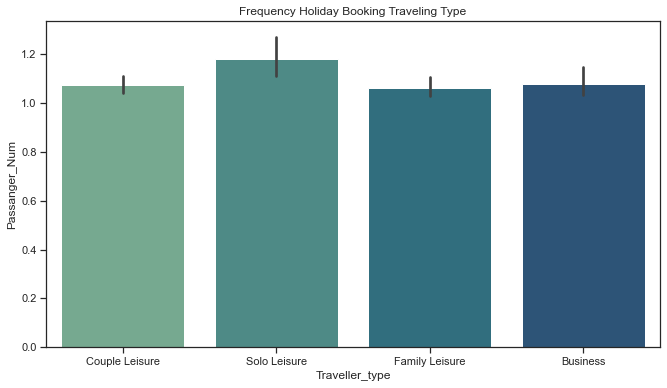

In [432]:
# Frequency Holiday Booking Traveler Type
# Create bar chart for waiting to travel
plt.figure(figsize = (11,6))
bar_3 = sns.barplot(data = airline_clean, x = 'Traveller_type', y = 'Passanger_Num', palette = 'crest')
plt.title("Frequency Holiday Booking Traveling Type")

# 
The most frequent holiday booking per traveler type is Solo Leisure


### Research Question 1 Response: overall rating of an airline correlate with specific service ratings
Using the passenger numbers to achieve the overall rating and the average rating for the specific service ratings.

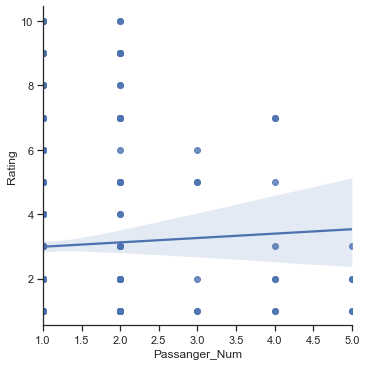

In [433]:
scatter_1 = sns.lmplot(x = 'Passanger_Num', y = 'Rating', data = airline_clean)

###### 
Then, further check the airline rating to review the average ranting initiate by the passenger who booked the airline. It obvious that the passenger who booked twice enjoy the booking process system most.   

### Research Question 2 : significant differences in customer satisfaction among different airlines class based on the reviews and ratings in the dataset

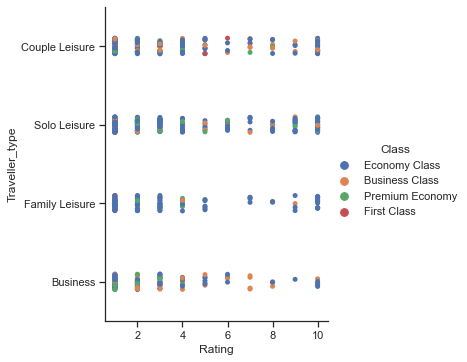

In [434]:
# Create a categorical plot in seaborn using the Traveler type categories

sns.set(style="ticks")
cat_2 = sns.catplot(x="Rating", y="Traveller_type", hue="Class", data=airline_clean)

# 
For Cat_2: this shows that passengers on couple leisure with Economy and Business Class including both on solo leisure and family leisure were amidst the passengers that contributed to the reviewers of holiday booking system.

In addition, chart reviewed that most of the Economy Class tickets were booked by Family on leisure

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple Leisure'),
  Text(1, 0, 'Solo Leisure'),
  Text(2, 0, 'Family Leisure'),
  Text(3, 0, 'Business')])

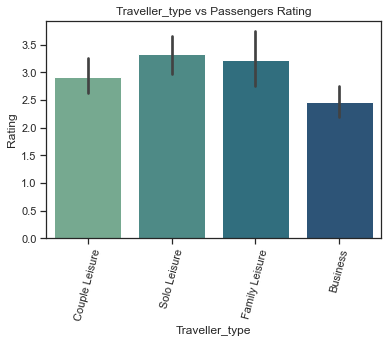

In [435]:
sns.barplot(x ='Traveller_type', y = 'Rating', data = airline_clean,
                 palette = 'crest')
plt.title("Traveller_type vs Passengers Rating")
plt.xticks(rotation = 75)

# 
It appears that Solo Leisure and Family Leisure enjoy the holiday booking system most

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Couple Leisure'),
  Text(2, 0, 'Family Leisure'),
  Text(3, 0, 'Solo Leisure')])

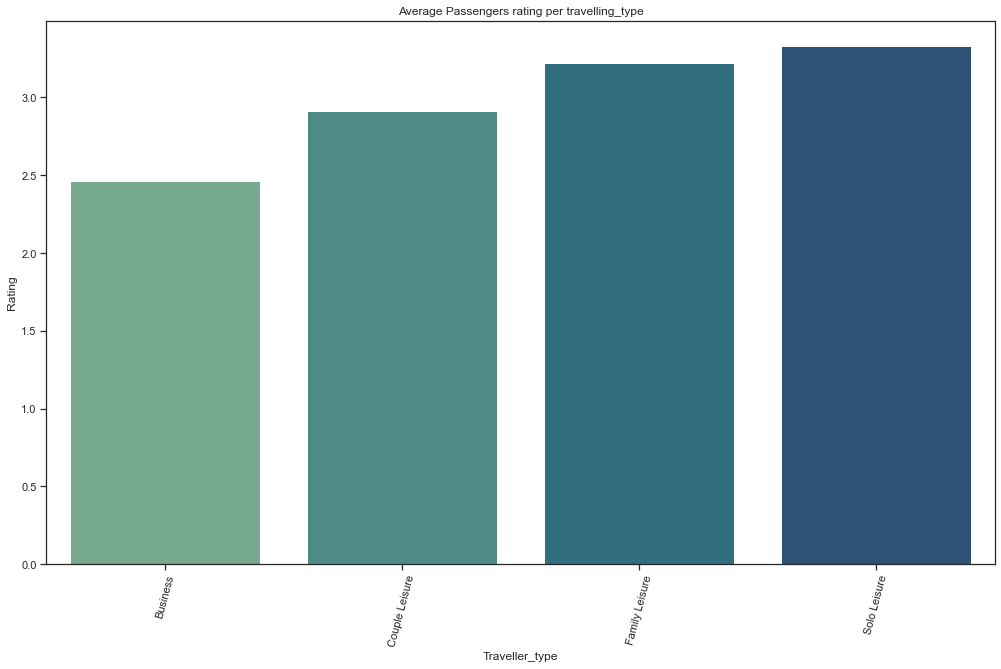

In [436]:
# Number of Passengers Rating per Traveller type

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of traveller and the mean value in rating
passengers_purchase_lead = airline_clean.groupby('Traveller_type')['Rating'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_6 = sns.barplot(x ='Traveller_type', y = 'Rating', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Passengers rating per travelling_type")
plt.xticks(rotation = 75)

### Relationship between the length of the review text and the overall rating given by the customer

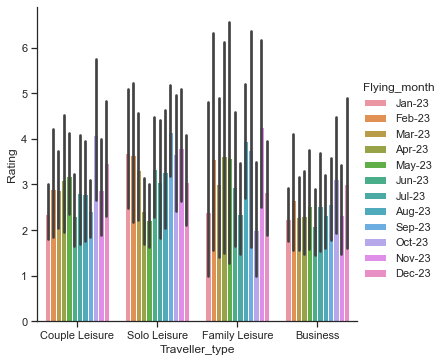

In [437]:
# Create a categorical plot in seaborn using the length of rewiews as period of text(which iis the "flying_month") 
# in rating the Airline and categories into travelers type 
sns.set(style="ticks")
a = sns.catplot(x="Traveller_type", y="Rating", hue="Flying_month", kind="bar", data=airline_clean)


#### Chart show passengers reviews text period of rating the airline holiday booking system. below are the reviewers,
- Passengers on Couple Leisure
- Passengers on Solo Leisure
- Passenger on Family Leisure
- Passenger on Business Trip
However, the length of review was from January to December. I realized most of the highest rate length appears in October from passengers on "couple Leisure"
while February and September from passenger on "Solo Leisure". then, September,June, May,February and November for passenger on Family Leisure and Passenger on Business trip only rated well in December and October
Lastly, the Lowest rating appears among the passengers on business trip at January period.

(array([0, 1, 2]),
 [Text(0, 0, 'Not Verified'),
  Text(1, 0, 'Trip Verified'),
  Text(2, 0, 'Unknown')])

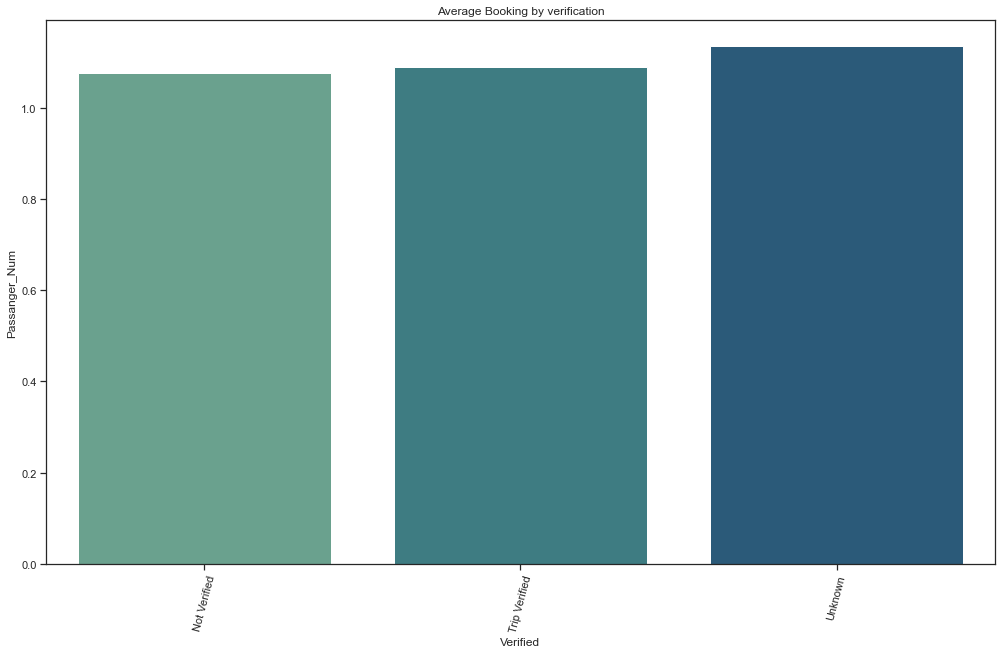

In [438]:
# Number of Passengers by Trip Verification

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_booking_verify_status = airline_clean.groupby('Verified')['Passanger_Num'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_7 = sns.barplot(x ='Verified', y = 'Passanger_Num', data = passengers_booking_verify_status,
                 palette = 'crest')
plt.title("Average Booking by verification")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan-23'),
  Text(1, 0, 'Feb-23'),
  Text(2, 0, 'Apr-23'),
  Text(3, 0, 'Jul-23'),
  Text(4, 0, 'Sep-23'),
  Text(5, 0, 'Aug-23'),
  Text(6, 0, 'May-23'),
  Text(7, 0, 'Jun-23'),
  Text(8, 0, 'Oct-23'),
  Text(9, 0, 'Nov-23'),
  Text(10, 0, 'Dec-23'),
  Text(11, 0, 'Mar-23')])

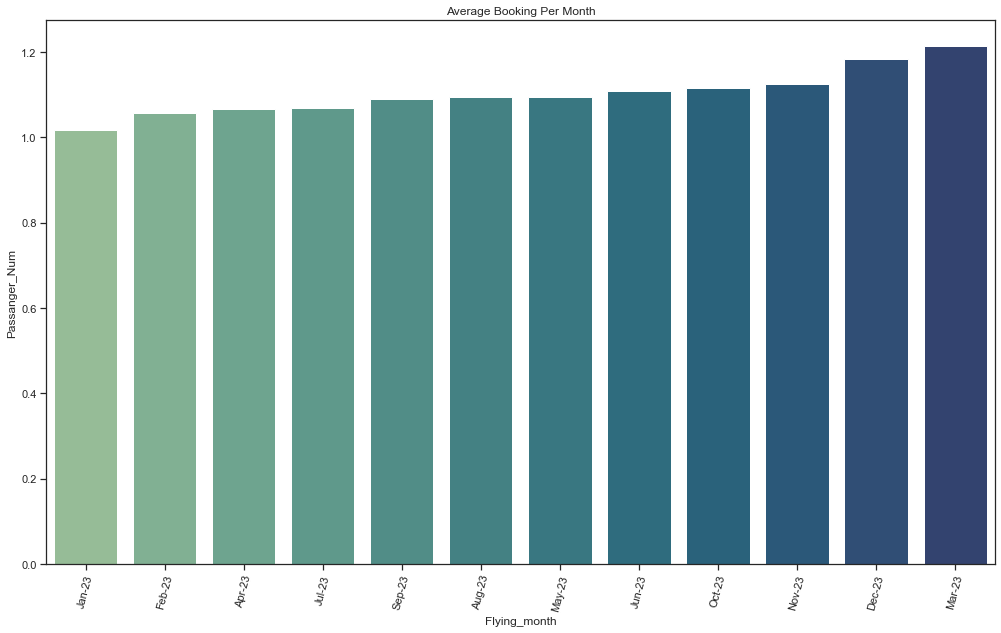

In [439]:
# Number of Passengers on Trip per month

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_booking_per_month = airline_clean.groupby('Flying_month')['Passanger_Num'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_7 = sns.barplot(x ='Flying_month', y = 'Passanger_Num', data = passengers_booking_per_month,
                 palette = 'crest')
plt.title("Average Booking Per Month")
plt.xticks(rotation = 75)

## Results - Information gained from analysis

#### The larger the number of passengers, the more period between booking and traveler type
#### Number of passengers increases as length of stay decreases.**
#### More people verification status to travel are unknown while difference between the verified and not verified are not too significant.
#### Most popular trip type is Solo leisure
#### Booking for longer holiday happens in Mar-23.


## Hyphothesis

#### 1. Larger number of Family travelling group prefer to book Economy and travel later. 
#### 2. Larger travelling group prefer shorter trips
#### 3. The longer passengers are not verified or unknown verification status, the longer the length of stay
#### 4. The type of trips has an impact on the type of booking services
#### 5. Destination country affects choice of services 